# Аналитика данных с помощью Pandas и Matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Начнем с необходимых приготовлений.

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [35]:
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [36]:
coins.head()

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [4]:
## Используем функцию unique(), применяя ее к столбцам coins
print("Посмотрим сколько всего разных символов")
symbol = coins.symbol.unique()
print(symbol)
print("Получаем", len(symbol), "различных символов")
print()
print("Посмотрим сколько всего разных наименований")
name = coins.name.unique()
print(name)
print("Получаем", len(name), "разных имен")

Посмотрим сколько всего разных символов
['BTC' 'LTC' 'DOGE' 'VTC' 'DGB' 'DASH' 'MAID' 'XLM' 'XVG' 'USDT' 'XEM'
 'ETH' 'REP' 'DCR' 'PIVX' 'LSK' 'WAVES' 'ETC' 'NEO' 'ICN' 'ZEC' 'GNT'
 'GNO' 'ANT' 'AE' 'BAT' 'VERI' 'FUN' 'PAY' 'SNT' 'EOS' 'GAS' 'MTL' 'PPT'
 'BTM' 'OMG' 'CVC' 'ETHOS' 'BNB' 'BCH' 'ZRX' 'VEN' 'NAS' 'WTC' 'LRC' 'KNC'
 'TRX' 'MANA' 'SALT' 'ADA' 'RHOC' 'ENG' 'AION' 'KCS' 'ICX' 'POWR' 'BTG'
 'QASH' 'DRGN' 'ELF' 'SRN' 'ZIL' 'POLY' 'CENNZ' 'LOOM' 'CTXC']
Получаем 66 различных символов

Посмотрим сколько всего разных наименований
['Bitcoin' 'Litecoin' 'Dogecoin' 'Vertcoin' 'DigiByte' 'Dash'
 'MaidSafeCoin' 'Stellar' 'Verge' 'Tether' 'NEM' 'Ethereum' 'Augur'
 'Decred' 'PIVX' 'Lisk' 'Waves' 'Ethereum Classic' 'NEO' 'Iconomi' 'Zcash'
 'Golem' 'Gnosis' 'Aragon' 'Aeternity' 'Basic Attention Token'
 'Veritaseum' 'FunFair' 'TenX' 'Status' 'EOS' 'Gas' 'Metal' 'Populous'
 'Bitmark' 'OmiseGO' 'Civic' 'Ethos' 'iCoin' 'Binance Coin' 'Bitcoin Cash'
 'Bytom' '0x' 'VeChain' 'Nebulas' 'Waltonchain

Проблема в том, что есть разные монеты, которые имеют одинаковые символы. Например Bitcoin Gold и Bitgem имеют одинаковые символы BTG. Поэтому правильный ответ: 70 разных монет

### 2. За какой период данные мы имеем? (0.4 балла)

In [5]:
last_date = coins["date"].max()
first_date = coins["date"].min()
print("Мы имеем данные за период с", first_date, "до", last_date)

Мы имеем данные за период с 2013-04-28 до 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [6]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Пропуски есть в столбцах количества транзакций в сети данной монеты, объема монет и количества адресов
Вызваны они наверняка неполадками в работе самой биржи из-за слишком большого количества данных

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [7]:
## Выведем строку с монетой, у которой значение price максимально
coins[coins['price'] == coins['price'].max()]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
25971,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


In [8]:
## Выведем строку с монетой, у которой значение high максимально (то есть максимальная цена в течение торгового дня)
coins[coins['high'] == coins['high'].max()]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
25971,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


Получаем, что максимальная цена была у Биткоина 17 Декабря 2017 года. Ее цена была равна 19475.8 долларов, а максимум во время тороговой сессии был на уровне 20089 долларов

### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [9]:
## Создадим словарь, где ключом будет имя монеты, а значением ее суммарная капитализация
cap = {}
## заполним этот словарь
for n in name:
    cap[n] = coins.loc[coins['name'] == n, 'market'].sum()
## Находим максимальную и минимальную капитализацию
max_cap = max(cap.values())
min_cap = min(cap.values())
## Теперь выведем максимальную и минимальную капитализацию с названием монетки
for key in cap:
    if cap[key] == max_cap:
        print("Максимальная суммарная капитализация у", key, "равна", cap[key])
    if cap[key] == min_cap:
        print("Минимальная суммарная капитализация у", key, "равна", cap[key])

Максимальная суммарная капитализация у Bitcoin равна 57439466431000.0
Минимальная суммарная капитализация у KingN Coin равна 10608251.0


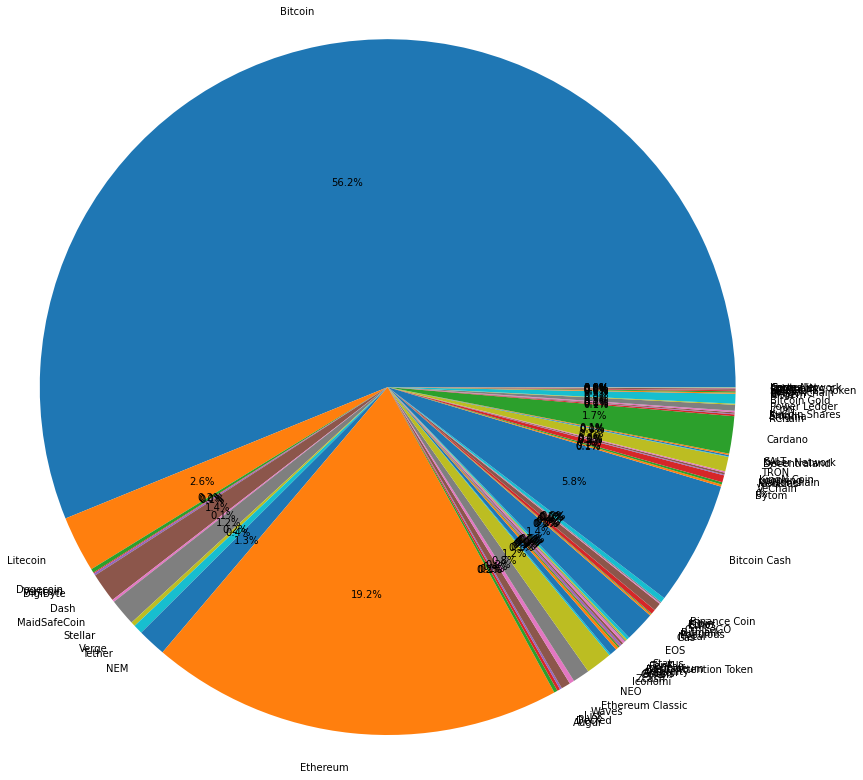

In [10]:
## Теперь займемся диаграммой
## У нас уже есть словарь с капиталицией, сделаем из него Dataframe
df_cap = pd.DataFrame(list(cap.items()), columns = ['Name', 'Capitalization'])
## Развлекаемся дальше, теперь сама круговая диаграмма с долями
plt.pie(
    df_cap["Capitalization"],
    labels = list(df_cap["Name"]),
    radius = 4,
    autopct = '%1.1f%%'
)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [11]:
import mplfinance as mpf

In [12]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    
    df_sym = pd.DataFrame({"Open": coins["open"],
                          "Close": coins["close"],
                           "High": coins["high"],
                          "Low": coins["low"],
                          "Close": coins["close"],
                          "Volume": coins["volume"],
                          "Date": coins["date"],
                          "Symbol": coins["symbol"]})
    
    df_sym = df_sym.loc[df_sym["Symbol"] == symbol]
    df_sym = df_sym.loc[df_sym["Date"] <= end_date]
    df_sym = df_sym.loc[df_sym["Date"] >= start_date]
    
    df_sym["Date"] = pd.to_datetime(df_sym["Date"])
    
    date = df_sym["Date"].to_numpy()
    df_sym.index = date
    df_sym.index.name = "date"

    mpf.plot(df_sym,
             type = 'candle',
             style = 'yahoo', 
             mav=(3, 6, 9), 
             figratio=(3, 1), 
             title = symbol)    

Посмотрим, что получилось:

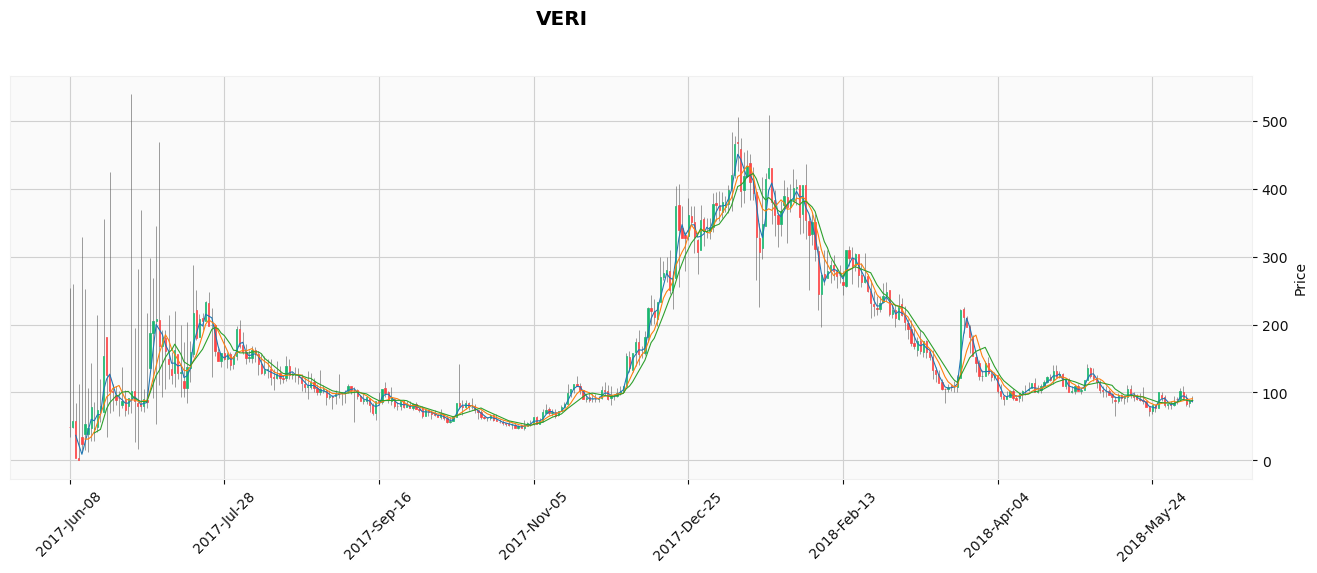

In [13]:
plot_fancy_price_action(coins = coins, symbol = 'VERI', start_date = '2013-06-01', end_date = '2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [14]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    
    df_pnd = coins.loc[coins["symbol"] == symbol]
    df_pnd = df_pnd.loc[df_pnd["date"] <= end_date]
    df_pnd = df_pnd.loc[df_pnd["date"] >= start_date]
    
    def calculate_pnd(row):
        max_value = max(row['open'], row['close'])
        return row['high'] / max_value
    
    df_pnd["Pnd"] = df_pnd.apply(calculate_pnd, axis = 1)
    max_pnd = max(df_pnd["Pnd"])
    
    print(df_pnd.loc[df_pnd["Pnd"] == max_pnd][["name", "date", "Pnd"]])

In [15]:
find_most_severe_pump_and_dump(coins, symbol = 'BTC', start_date = '2017-06-01', end_date = '2018-06-01')

          name        date       Pnd
24860  Bitcoin  2017-11-29  1.142894


Сравните эти значения для разных монет:

Уточнение: Помним, что у некоторых монет символы одни и те же (т.к. 66 символов и 70 монет). Поэтому я переделаю здесь функцию, чтобы вместо символа было название монеты

In [16]:
## Функция
def find_PnD(coins, name, start_date, end_date):
    
    df_pnd = coins.loc[coins["name"] == name]
    df_pnd = df_pnd.loc[df_pnd["date"] <= end_date]
    df_pnd = df_pnd.loc[df_pnd["date"] >= start_date]
    
    def calculate_pnd(row):
        max_value = max(row['open'], row['close'])
        return row['high'] / max_value
    
    df_pnd["Pnd"] = df_pnd.apply(calculate_pnd, axis = 1)
    max_pnd = max(df_pnd["Pnd"])
## Уберем даты для удобства    
    return max_pnd
    
## Код, который будет прогонять каждую монету через эту функцию

## Введем даты сюда, чтобы можно было их менять, если вдруг захочется поиграться
date_s = '2017-06-01'
date_f = '2018-06-01'
## Используем созданный в начале массив имен, сделаем словарь, где ключом будет имя, а значением ее pnd
pnd = {}
for n in name:
    pnd[n] = find_PnD(coins, n, date_s, date_f)

In [17]:
## Можно вывести весь словарь
for key in pnd:
    print(key, pnd[key])

Bitcoin 1.1428940004366206
Litecoin 1.1082257158899496
Dogecoin 1.2747326203208558
Vertcoin 1.3952095808383234
DigiByte 1.359942799461642
Dash 1.2031621370259378
MaidSafeCoin 1.291362434422475
Stellar 1.332510511325105
Verge 1.726864726979804
Tether 1.099009900990099
NEM 1.1358695652173911
Ethereum 1.1433508255471652
Augur 1.477601285025879
Decred 1.8054444587795122
PIVX 1.3587962962962963
Lisk 1.4424778761061947
Waves 1.2543352601156068
Ethereum Classic 1.1482493171095107
NEO 1.232142857142857
Iconomi 1.5273318310770996
Zcash 1.3298776561493881
Golem 1.6882121234525305
Gnosis 1.653659748974773
Aragon 1.7336683417085428
Aeternity 1.7482936279178192
Basic Attention Token 1.2342492522991364
Veritaseum 33.549253731343285
FunFair 12.490562327959102
TenX 1.3514021619927934
Status 1.3861630321910696
EOS 1.3202933985330074
Gas 1.477106227106227
Metal 1.6728538283062646
Populous 3.720797720797721
Bitmark 7.177933491925104
OmiseGO 1.3312148056585635
Civic 1.726167450721039
Ethos 1.3698404867620

In [18]:
## Можно отсортировать этот словарь по значению пампа и снова вывести
sorted_values = sorted(pnd.values()) # Sort the values
sorted_pnd = {}

for i in sorted_values:
    for k in pnd.keys():
        if pnd[k] == i:
            sorted_pnd[k] = pnd[k]
            break

for key in sorted_pnd:
    print(key, sorted_pnd[key])

Tether 1.099009900990099
Litecoin 1.1082257158899496
NEM 1.1358695652173911
Cortex 1.1428571428571428
Bitcoin 1.1428940004366206
Ethereum 1.1433508255471652
Ethereum Classic 1.1482493171095107
Nebulas 1.1758241758241759
Binance Coin 1.176079734219269
Centrality 1.1777531885963237
Dash 1.2031621370259378
Dragonchain 1.211764705882353
Bytom 1.2126867334267122
SALT 1.227206946454414
NEO 1.232142857142857
Basic Attention Token 1.2342492522991364
ICON 1.2538461538461536
Waves 1.2543352601156068
0x 1.254990051045648
VeChain 1.2713567839195978
Dogecoin 1.2747326203208558
aelf 1.2808988764044942
Cardano 1.2906403940886697
MaidSafeCoin 1.291362434422475
Kyber Network 1.2950191570881227
EOS 1.3202933985330074
KuCoin Shares 1.3243755975664018
Zcash 1.3298776561493881
OmiseGO 1.3312148056585635
Stellar 1.332510511325105
TenX 1.3514021619927934
PIVX 1.3587962962962963
DigiByte 1.359942799461642
Enigma 1.3618677042801557
Aion 1.3624161073825503
Power Ledger 1.3641688298886077
Bitcoin Gold 1.36514352

Теперь благодаря такому словарю можно сравнивать максимальный **pump and dump** для разных монет и увидеть например, Theter (являющийся стейблкоином) был стабильным, Bitcoin особо не пампили, а вот Veritaseum хорошо прошелся по кошелькам некоторых хомяков :)

In [19]:
from matplotlib import pyplot as plt

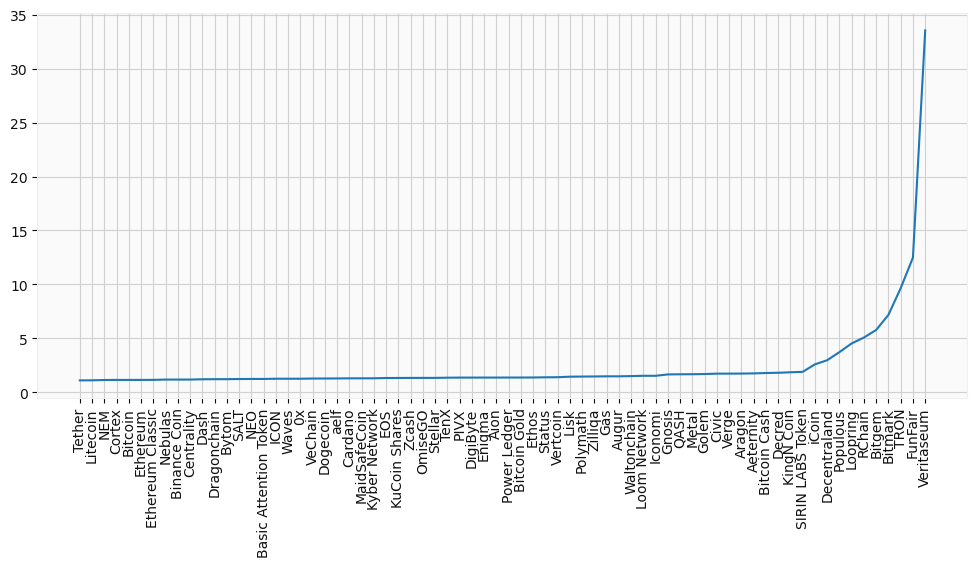

In [20]:
## Почему бы не построить графичек
x = []
y = []
for key in sorted_pnd:
    x.append(key)
    y.append(sorted_pnd[key])

plt.figure(figsize = (12, 5))
plt.plot(x, y)
plt.xticks(rotation = 90) 
plt.show()


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [21]:
def compute_roi(coins, investments, start_date, end_date):
    dict1 = {}
    for k in investments:
        df = coins.loc[coins["symbol"] == k]
        df = df.loc[df["date"] == start_date]
        ## Использую функцию максимума чтобы она вернула мне лишь число (там максимум из одного элемента)
        dict1[k] = max(df["price"])
        
    ## Посчитаем, сколько монет мы купили на наши суммы
    inv = {}
    for k in investments:
        inv[k] = investments[k] / dict1[k]
    
    ## Теперь посмотрим на цены в дату end
    dict2 = {}
    for k in investments:
        df = coins.loc[coins["symbol"] == k]
        df = df.loc[df["date"] == end_date]
        dict2[k] = max(df["price"])
        
    ## Теперь посчитаем, сколько долларов у нас на счету в конце
    for k in inv:
        inv[k] = inv[k] * dict2[k]
        
    ## Считаем суммы в начале и в конце
    sum_start = 0
    sum_end = 0
    for k in investments:
        sum_start += investments[k]
        sum_end += inv[k]
    
    ## Теперь считаем наш ROI
    roi = (sum_end - sum_start) / sum_start
    ## Для удобства выразим его в процентах
    print(round(roi * 100, 5), "%")

In [22]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-3.55691 %


In [23]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

5128.3303 %


Нужно было вкладываться в Биткоин до того как это стало мэйнстримом :)

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [24]:
def plot_bollinger_bands(coins, symbol, window, width):
    sym = coins.loc[coins["symbol"] == symbol]
    ma = sym["price"].rolling(window = window).mean()
    sd = sym["price"].rolling(window = window).std()

    ## Сделаем массивы нужных нам значений
    ma = ma.to_numpy()
    sd = sd.to_numpy()
    prices = sym["price"].to_numpy()
    g_high = ma + width * sd
    g_low = ma - width * sd
    dates = pd.to_datetime(sym['date'])
    
    ## Теперь рисуем сами графики
    fig, ax = plt.subplots(figsize = (14, 9))
    plt.plot(dates, prices, label = "Цена")
    plt.plot(dates, ma, label = "Скользящее среднее")
    plt.plot(dates, g_high, label = "Верхняя граница Боллинджера")
    plt.plot(dates, g_low, label = "Нижняя граница Боллинджера")
    plt.title(f"Графики для {symbol}")
    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper left')
    plt.show()

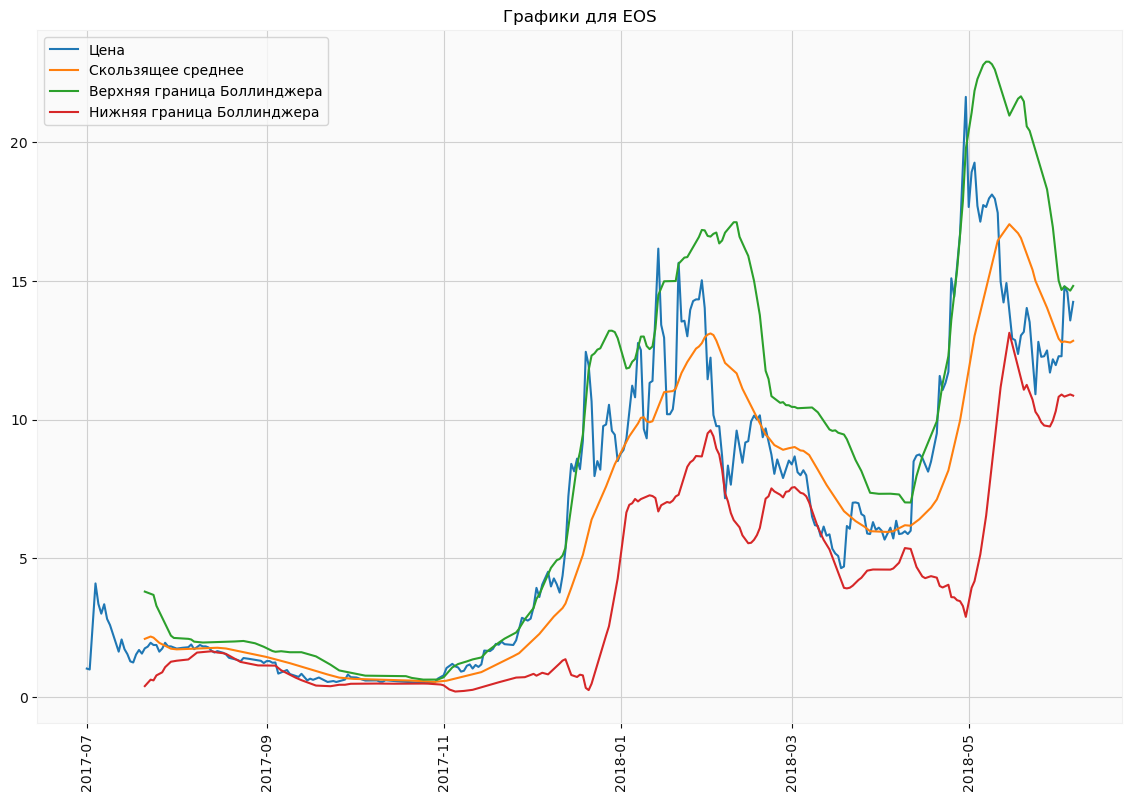

In [25]:
plot_bollinger_bands(coins = coins, symbol = 'EOS', window = 21, width = 2)  # тут должен появиться график

*Сделайте вывод о том, выполнялось ли правило Боллинджера:*

В общем и целом **правило Боллинджера выполняется**, но есть моменты, где цена немного перескакивает границы. Особенно в конце цена часто заскакивала выше верхней границы Боллинджера. Но в итоге пошла вниз, согласно правилу

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [26]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 14))
    cap = {}
    
    for s in symbols:
        df_s = coins.loc[coins["symbol"] == s]
        df_s = df_s.loc[df_s["date"] >= start_date]
        cap[s] = df_s["market"].to_numpy()
        
        ax1.plot(pd.to_datetime(df_s["date"]), cap[s], label = s)        

    ax1.set_title(f"Капитализации монет")
    ax1.legend(loc = 'upper left')
    
    coins2 = coins.loc[coins["date"] >= start_date]
    all_cap = coins2.groupby(['date'])['market'].sum().to_numpy()
    shares = {}
    
    for s in symbols:
        if len(cap[s]) < len(all_cap):
            cap[s] = np.append(np.zeros(len(all_cap) - len(cap[s])), cap[s])
            
        shares[s] = cap[s] / all_cap
        ax2.plot(pd.to_datetime(coins2["date"]).unique(), shares[s], label = s)
        
    ax2.set_title(f"Доля к общей капитализации")
    ax2.legend(loc = 'upper left')
    
    

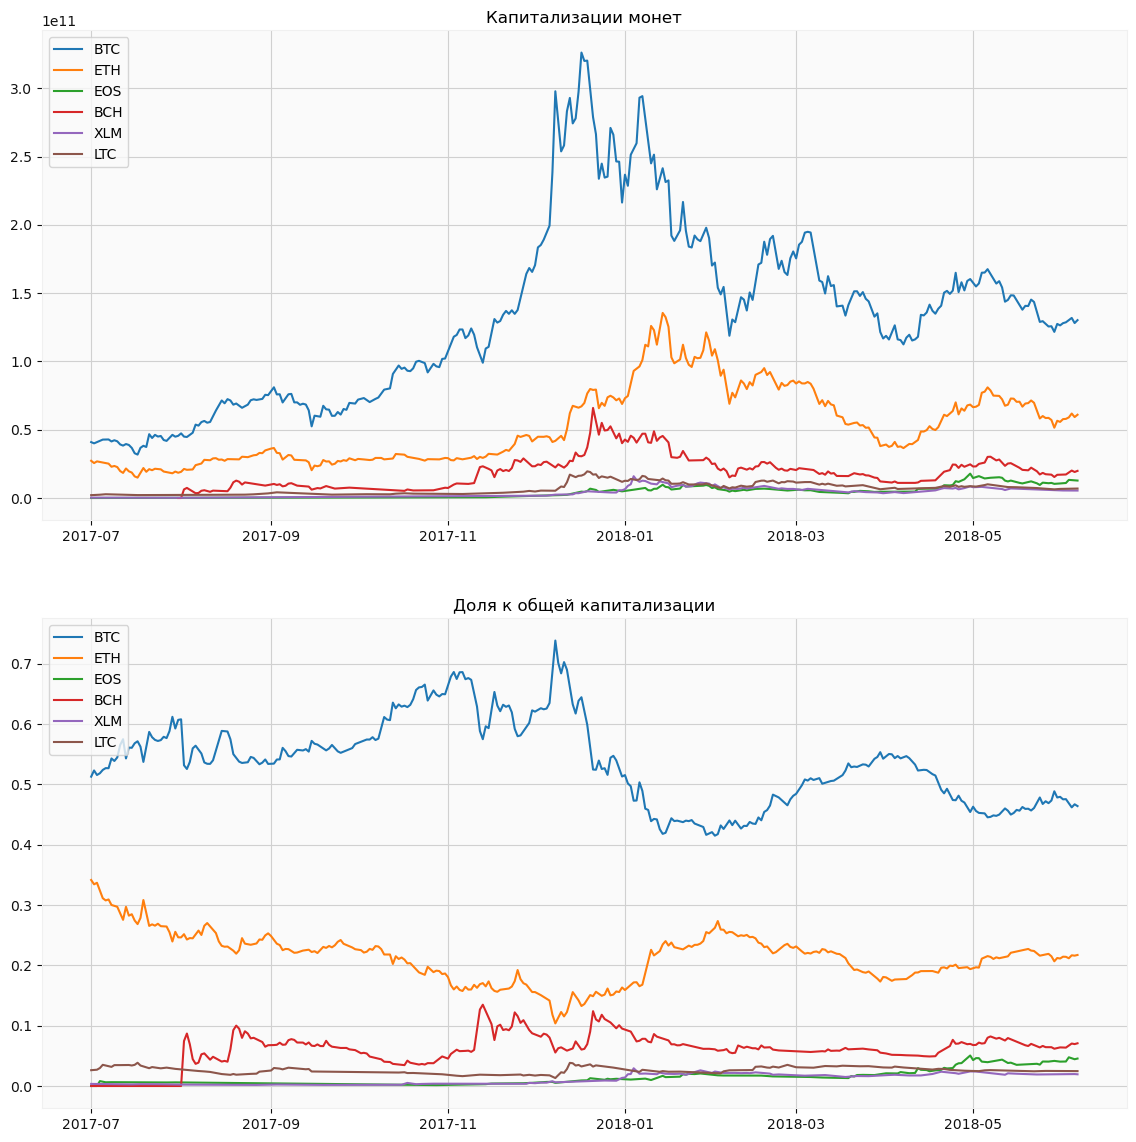

In [27]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Мы видим, что у ETH, EOS, XLM возникает такая зависимость: чем больше доля капитализации Биткоина, тем меньше доля капитализации у альткоинов. У LTC и BCH такой зависимости не прослеживается. Такую зависимость можно объяснить тем, что когда Биткоином меньше торгуют, то его место сразу занимают другие монеты

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [28]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    
    coins2 = coins.loc[coins["date"] <= date]
    all_cap = coins2.groupby(['date'])['market'].sum().to_numpy()
    shares = {}
    
    for sym in symbols:
        df_coin = coins[(coins['symbol'] == sym) & (coins['date'] <= date)]["market"]
        
        if len(df_coin) < len(all_cap):
            df_coin = np.append(np.zeros(len(all_cap) - len(df_coin)), df_coin)
            
        share = np.array(df_coin) / all_cap
        
        mean_share = list(pd.Series(share).ewm(alpha = alpha).mean())
        shares[sym] = mean_share[-(window + 1):]
    
    res = pd.DataFrame(shares)
    return res.corr()

In [29]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols = ['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window = 21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap = 'coolwarm').set_precision(2)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_10012\2548476272.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.00,0.77,-0.96,-0.81,-0.74,-0.91
ETH,0.00,1.00,-0.32,-0.28,-0.58,-0.60,-0.39
EOS,0.77,-0.32,1.00,-0.66,-0.45,-0.50,-0.58
BCH,-0.96,-0.28,-0.66,1.00,0.93,0.88,0.98
XLM,-0.81,-0.58,-0.45,0.93,1.00,0.96,0.97
LTC,-0.74,-0.60,-0.50,0.88,0.96,1.00,0.91
ADA,-0.91,-0.39,-0.58,0.98,0.97,0.91,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [30]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_10012\925846226.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.49,-0.81,-0.80,-0.73,-0.65,-0.87
ETH,-0.49,1.00,-0.06,0.77,-0.20,-0.23,0.04
EOS,-0.81,-0.06,1.00,0.31,0.99,0.96,0.98
BCH,-0.80,0.77,0.31,1.00,0.21,0.07,0.42
XLM,-0.73,-0.20,0.99,0.21,1.00,0.97,0.97
LTC,-0.65,-0.23,0.96,0.07,0.97,1.00,0.91
ADA,-0.87,0.04,0.98,0.42,0.97,0.91,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

In [31]:
## Пример не запустился на ноутбуке 
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

TypeError: cannot do slice indexing on Int64Index with these indexers [2017-05-01] of type str

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [37]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    df_coin = coins.loc[pd.to_datetime(coins["date"]) <= end_date]
    df_coin = df_coin.loc[pd.to_datetime(df_coin["date"]) >= start_date]
    prices = df_coin["close"]
    dates = pd.to_datetime(df_coin["date"])
    
    lead = prices.rolling(lead_window).mean()
    lag = prices.rolling(lag_window).mean()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 14))
    
    ## Сначала построим правый график
    ax2.plot(prices, label = "Цена")
    ax2.plot(lead, label = "Ведущее среднее")
    ax2.plot(lag, label = "Запаздывающее среднее")
    ax2.legend(loc = 'upper left')
    ax2.set_title(f"Цена и скользящее среднее для {symbol}")
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price')
    
    ## Посмотрим на доходность при стратегии покупать и держать
    pr = prices.to_numpy()
    invest = pr[0]
    
    r = df_coin["close"] / df_coin["close"].shift(1).fillna(df_coin["close"])
    multipliers = [1]
    r = r.to_numpy()
    for i in range(1, len(r)):
        multiplier = multipliers[i - 1] * r[i]
        multipliers.append(multiplier)
    
    ## Теперь вторая стратегия
    k = 1
    return_new_strategy = [invest]
    lead = lead.to_numpy()
    lag = lag.to_numpy()
    for i in range(1, len(pr)):
        if (lead[i] - lag[i]) / float(pr[i]) >= threshold:
            k += 1
            invest += pr[i]
            return_new_strategy.append(k * pr[i])
        else:
            return_new_strategy.append(k * pr[i])
    
    ## Считаем доходность первой стратегрии если бы мы инвестировали в сумме столько же сколько во вторую
    return_buy_n_hold = invest * np.array(multipliers)
    
    ax1.plot(dates, return_buy_n_hold, label = "Купить и держать")
    ax1.plot(dates, return_new_strategy, label = "Наша стратегия")
    ax1.legend(loc = 'upper left')
    ax1.set_title(f'Доходности стратегий для {symbol}')
    
    
    

In [38]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

Лучше просто купить и держать, чем пытаться играть. Будет меньше нервов и потерь

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.